<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/logistic_regresiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('test.csv',sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
bank_client = bank.iloc[:,0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,30,unemployed,married,primary,no,1787,no,no
1,33,services,married,secondary,no,4789,yes,yes
2,35,management,single,tertiary,no,1350,yes,no
3,30,management,married,tertiary,no,1476,yes,yes
4,59,blue-collar,married,secondary,no,0,yes,no


<ipython-input-5-93b34b9fd13a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_client['age'],ax=ax2)


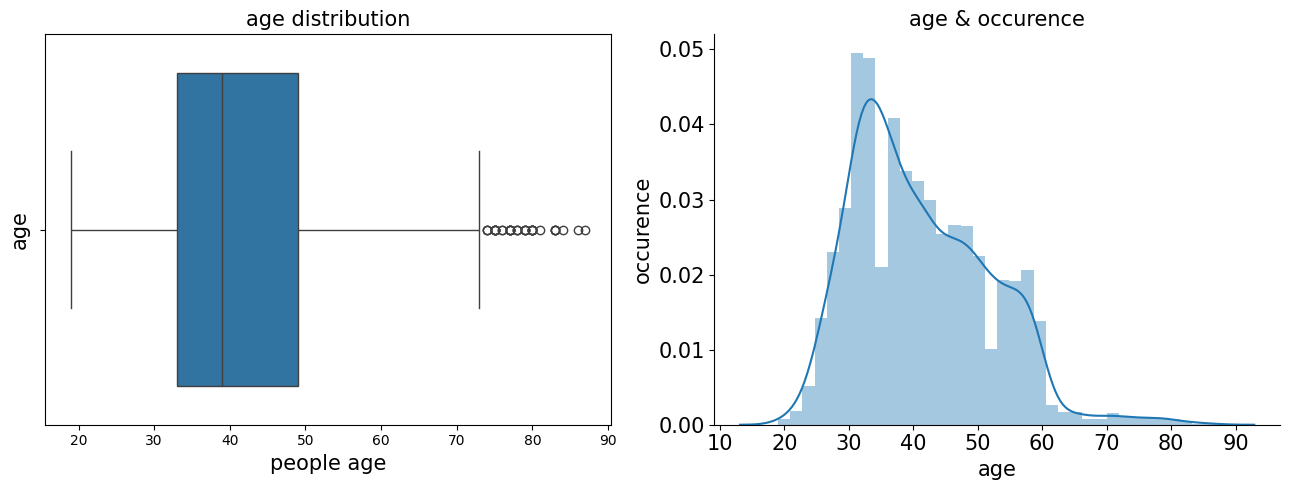

In [5]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (13,5))

sns.boxplot(x='age',data = bank_client,orient='y',ax=ax1)
ax1.set_xlabel('people age',fontsize=15)
ax1.set_ylabel('age',fontsize=15)
ax1.set_title('age distribution',fontsize=15)

sns.distplot(bank_client['age'],ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('age',fontsize=15)
ax2.set_ylabel('occurence',fontsize=15)
ax2.set_title('age & occurence',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

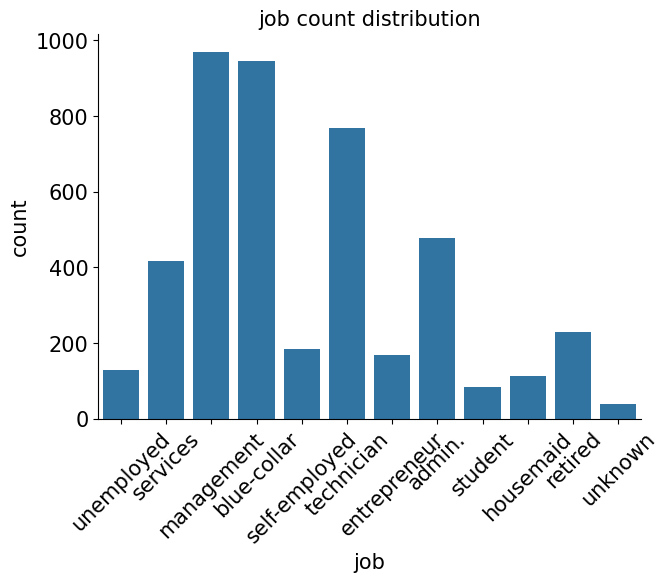

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(7,5)
sns.countplot(x='job',data=bank_client)
ax.set_xlabel('job',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('job count distribution',fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

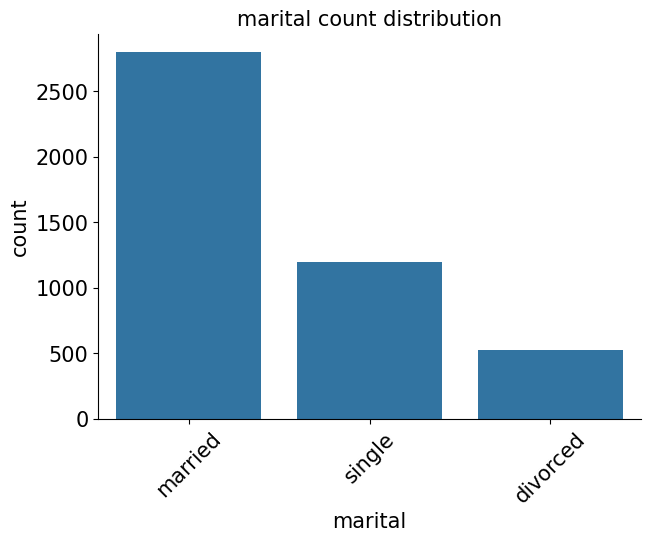

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(7,5)
sns.countplot(x='marital',data=bank_client)
ax.set_xlabel('marital',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('marital count distribution',fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

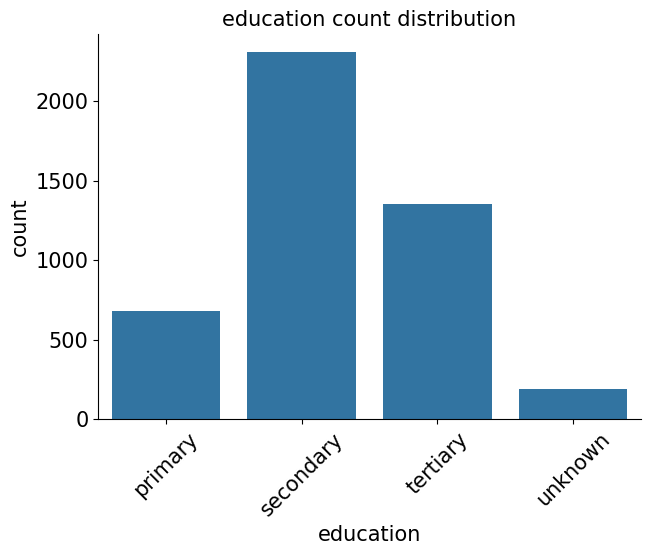

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(7,5)
sns.countplot(x='education',data=bank_client)
ax.set_xlabel('education',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('education count distribution',fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

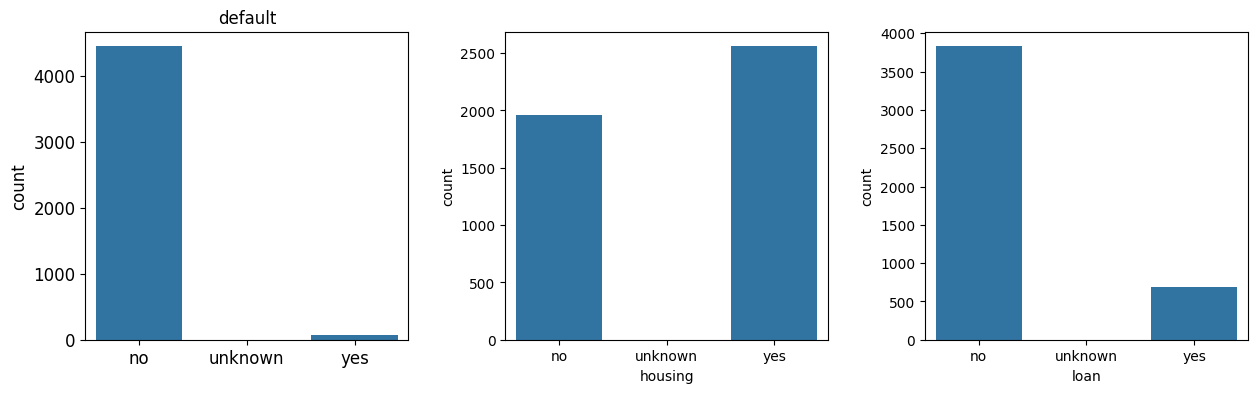

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.countplot(x='default',data=bank_client,ax=ax1,order=['no','unknown','yes'])
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('default',fontsize=12)
ax1.tick_params(labelsize=12)

sns.countplot(x='housing',data=bank_client,ax=ax2,order=['no','unknown','yes'])
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('default',fontsize=12)
ax1.tick_params(labelsize=12)

sns.countplot(x='loan',data=bank_client,ax=ax3,order=['no','unknown','yes'])
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('default',fontsize=12)
ax1.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.3)

In [10]:
bank_related = bank.iloc[:,8:12]
bank_related.head()

,contact,day,month,duration
0,cellular,19,oct,79
1,cellular,11,may,220
2,cellular,16,apr,185
3,unknown,3,jun,199
4,unknown,5,may,226


<ipython-input-11-df41fbd132fc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_related['duration'],ax=ax2)


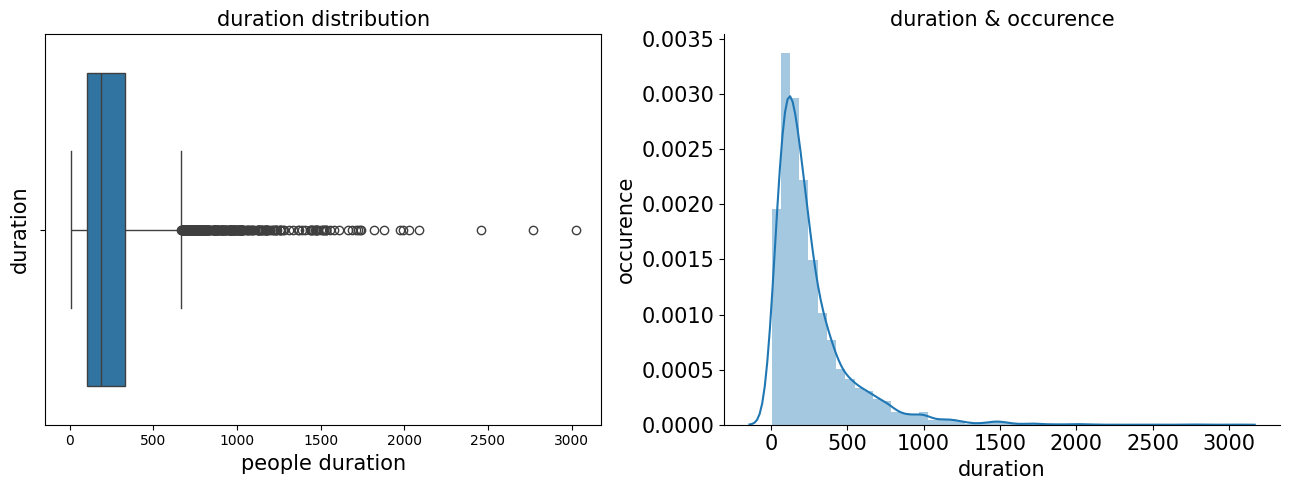

In [11]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (13,5))

sns.boxplot(x='duration',data = bank_related,orient='y',ax=ax1)
ax1.set_xlabel('people duration',fontsize=15)
ax1.set_ylabel('duration',fontsize=15)
ax1.set_title('duration distribution',fontsize=15)

sns.distplot(bank_related['duration'],ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('duration',fontsize=15)
ax2.set_ylabel('occurence',fontsize=15)
ax2.set_title('duration & occurence',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

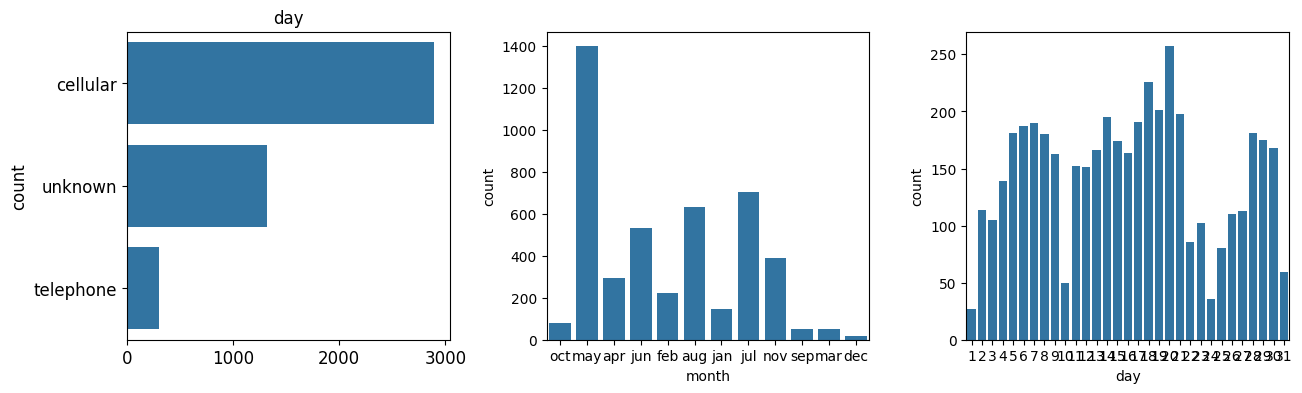

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.countplot(data=bank_related['contact'],ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('contact',fontsize=12)
ax1.tick_params(labelsize=12)

sns.countplot(x='month',data=bank_related,ax=ax2)
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('month',fontsize=12)
ax1.tick_params(labelsize=12)

sns.countplot(x='day',data=bank_related,ax=ax3)
ax1.set_xlabel('')
ax1.set_ylabel('count',fontsize=12)
ax1.set_title('day',fontsize=12)
ax1.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.3)

In [13]:
bank_o = bank.iloc[:,13:]
bank_o.head()

,pdays,previous,poutcome,y
0,-1,0,unknown,no
1,339,4,failure,no
2,330,1,failure,no
3,-1,0,unknown,no
4,-1,0,unknown,no


資料前處理

In [14]:
print(set(bank['y']))
print(set(bank['poutcome']))

{'no', 'yes'}
{'unknown', 'other', 'success', 'failure'}


In [15]:
y = pd.get_dummies(bank['y'],columns = ['y'],prefix='y',drop_first=True)
y.tail()

,y_yes
4516,False
4517,False
4518,False
4519,False
4520,False


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

bank_client['job'] = label_encoder.fit_transform(bank_client['job'])
bank_client['marital'] = label_encoder.fit_transform(bank_client['marital'])
bank_client['education'] = label_encoder.fit_transform(bank_client['education'])
bank_client['default'] = label_encoder.fit_transform(bank_client['default'])
bank_client['housing'] = label_encoder.fit_transform(bank_client['housing'])
bank_client['loan'] = label_encoder.fit_transform(bank_client['loan'])

bank_related['contact'] = label_encoder.fit_transform(bank_related['contact'])
bank_related['month'] =  label_encoder.fit_transform(bank_related['month'])
bank_related['day'] =   label_encoder.fit_transform(bank_related['day'])

bank_o['poutcome'].replace(['unknown', 'success', 'failure', 'other'],[1,2,3,4],inplace=True)

<ipython-input-16-076ed17a68de>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_o['poutcome'].replace(['unknown', 'success', 'failure', 'other'],[1,2,3,4],inplace=True)
<ipython-input-16-076ed17a68de>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_o['poutcome'].replace(['unknown', 'su

In [17]:
print(f'Q1:{bank_client["age"].quantile(q=0.25)}')
print(f'Q2:{bank_client["age"].quantile(q=0.5)}')
print(f'Q3:{bank_client["age"].quantile(q=0.75)}')
print(f'Q4:{bank_client["age"].quantile(q=1.00)}')

print(f'ages above:{bank_client["age"].quantile(q=0.75) +1.5*(bank_client["age"].quantile(q=0.75) - bank_client["age"].quantile(q=0.25))}')

Q1:33.0
Q2:39.0
Q3:49.0
Q4:87.0
ages above:73.0


In [18]:
def age_enc(dataframe):
  dataframe.loc[dataframe['age']<=33,'age'] = 1
  dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 49),'age'] = 2
  dataframe.loc[(dataframe['age'] > 49) & (dataframe['age'] <= 73),'age'] = 3
  dataframe.loc[(dataframe['age'] > 73) & (dataframe['age'] <= 87),'age'] = 4
  return dataframe

age_enc(bank_client)

,age,job,marital,education,default,balance,housing,loan
0,1,10,1,0,0,1787,0,0
1,1,7,1,1,0,4789,1,1
2,2,4,2,2,0,1350,1,0
3,1,4,1,2,0,1476,1,1
4,3,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
4516,1,7,1,1,0,-333,1,0
4517,3,6,1,2,1,-3313,1,1
4518,3,9,1,1,0,295,0,0
4519,1,1,1,1,0,1137,0,0


In [19]:
print(f'Q1:{bank_related["duration"].quantile(q=0.25)}')
print(f'Q2:{bank_related["duration"].quantile(q=0.5)}')
print(f'Q3:{bank_related["duration"].quantile(q=0.75)}')
print(f'Q4:{bank_related["duration"].quantile(q=1.00)}')

print(f'ages above:{bank_related["duration"].quantile(q=0.75) +1.5*(bank_client["age"].quantile(q=0.75) - bank_client["age"].quantile(q=0.25))}')

Q1:104.0
Q2:185.0
Q3:329.0
Q4:3025.0
ages above:330.5


In [20]:
def duration(data):
  data.loc[data["duration"] <= 104, "duration"] = 1
  data.loc[(data["duration"] > 104) & (data["duration"] <= 185),"duration"] = 2
  data.loc[(data["duration"] > 185) & (data["duration"] <= 329),"duration"] = 3
  data.loc[(data["duration"] > 329) & (data["duration"] <= 331),"duration"] = 4
  data.loc[data["duration"] > 331, "duration"] = 5
  return data

duration(bank_related)

,contact,day,month,duration
0,0,18,10,1
1,0,10,8,3
2,0,15,0,2
3,2,2,6,3
4,2,4,8,3
...,...,...,...,...
4516,0,29,5,3
4517,2,8,8,2
4518,0,18,1,2
4519,0,5,3,2


In [21]:
bank_final = pd.concat([bank_client,bank_related,bank_o],axis=1)
bank_final.shape

(4521, 16)

In [22]:
bank_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,1,10,1,0,0,1787,0,0,0,18,10,1,-1,0,1,no
1,1,7,1,1,0,4789,1,1,0,10,8,3,339,4,3,no
2,2,4,2,2,0,1350,1,0,0,15,0,2,330,1,3,no
3,1,4,1,2,0,1476,1,1,2,2,6,3,-1,0,1,no
4,3,1,1,1,0,0,1,0,2,4,8,3,-1,0,1,no


In [23]:
from sklearn.preprocessing import StandardScaler
bank_final_numeric = bank_final.select_dtypes(np.number)
bank_final_scale = StandardScaler().fit_transform(bank_final_numeric)
pd.DataFrame(bank_final_scale, columns=bank_final_numeric.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome
0,-1.325954,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-1.179919,-0.407218,-0.320413,-0.445367
1,-1.325954,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,0.173306,2.989044,2.041734,1.923460
2,0.053392,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.503306,2.899143,0.270124,1.923460
3,-1.325954,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,0.173306,-0.407218,-0.320413,-0.445367
4,1.432739,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,0.173306,-0.407218,-0.320413,-0.445367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-1.325954,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.173306,-0.407218,-0.320413,-0.445367
4517,1.432739,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.503306,-0.407218,-0.320413,-0.445367
4518,1.432739,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.503306,-0.407218,-0.320413,-0.445367
4519,-1.325954,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.503306,1.710451,1.451197,3.107873


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(bank_final_scale,y,
                                                 test_size=0.3,
                                                 random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score

cm = confusion_matrix(y_test,pred)
cm_df = pd.DataFrame({'Pred 0': cm[:, 0],
                      'Pred 1': cm[:, 1]},
                     index=['True 0', 'True 1'])
cm_df

,Pred 0,Pred 1
True 0,1194,11
True 1,138,14


In [29]:
tpr = round(cm[1][1] / (cm[1][1] + cm[1][0]), 4)  # True Positive Rate (TPR)
fnr = round(cm[1][0] / (cm[1][0] + cm[1][1]), 4)  # False Negative Rate (FNR)
accuracy = round((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]), 4)  # Accuracy

print(f'True Positive Rate (TPR): {tpr}')
print(f'False Negative Rate (FNR): {fnr}')
print(f'Accuracy: {accuracy}')


True Positive Rate (TPR): 0.0921
False Negative Rate (FNR): 0.9079
Accuracy: 0.8902


In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, model.decision_function(x_test))
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

df = pd.DataFrame({'Metric': ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1-score'],
                   'Value': [accuracy, auc, precision, recall, f1]})
df


,Metric,Value
0,Accuracy,0.890199
1,AUC,0.844862
2,Precision,0.560000
3,Recall,0.092105
4,F1-score,0.158192
